In [ ]:
import sys
!{sys.executable} -m pip install spotipy

In [1]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import pandas as pd 
import math
import warnings
import time
warnings.simplefilter("ignore")

In [2]:
sp = spotipy.Spotify()

USER_ID = "emilyrlandman"
TOP10_PLAYLIST_ID = "1ggWDL88pSeijtf7zifvF1"
ALBUMS_PLAYLIST_ID = "5YVVRDq8QLSB2wJ2lvq3Dx"
CLIENT_ID = "27a2df6fdb064b40b952dbe55f451421" 
CLIENT_SECRET = "a97bf4bf619b4239961eb80513e2c0e0" 
CLIENT_CREDENTIALS = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET) 

sp = spotipy.Spotify(client_credentials_manager=CLIENT_CREDENTIALS) 
sp.trace=False

In [3]:
Adele = sp.artist('4dpARuHxo51G3z768sgnrY')
Adele.keys()

dict_keys(['external_urls', 'followers', 'genres', 'href', 'id', 'images', 'name', 'popularity', 'type', 'uri'])

In [4]:
for key in list(Adele.keys()):
    print(f"{key}: {Adele[key]}")
    print()

external_urls: {'spotify': 'https://open.spotify.com/artist/4dpARuHxo51G3z768sgnrY'}

followers: {'href': None, 'total': 22210200}

genres: ['british soul', 'pop', 'uk pop']

href: https://api.spotify.com/v1/artists/4dpARuHxo51G3z768sgnrY

id: 4dpARuHxo51G3z768sgnrY

images: [{'height': 1000, 'url': 'https://i.scdn.co/image/ccbe7b4fef679f821988c78dbd4734471834e3d9', 'width': 1000}, {'height': 640, 'url': 'https://i.scdn.co/image/f8737f6fda048b45efe91f81c2bda2b601ae689c', 'width': 640}, {'height': 200, 'url': 'https://i.scdn.co/image/df070ad127f62d682596e515ac69d5bef56e0897', 'width': 200}, {'height': 64, 'url': 'https://i.scdn.co/image/cbbdfb209cc38b2999b1882f42ee642555316313', 'width': 64}]

name: Adele

popularity: 84

type: artist

uri: spotify:artist:4dpARuHxo51G3z768sgnrY



In [5]:
# First we have to gather the total number of tracks in the playlist 
track_count = sp.user_playlist_tracks(USER_ID, TOP10_PLAYLIST_ID, 'total')['total']

# Then we calculate the number of times we'll have to call the API
iterations = math.ceil(track_count/100)

# Finally we begin our loop
attributes_df = pd.DataFrame()
information_df = pd.DataFrame()
for i in range(iterations):
    playlist = sp.user_playlist_tracks(USER_ID, TOP10_PLAYLIST_ID, None, None, i*100) # documentation - https://spotipy.readthedocs.io/en/2.13.0/
    songs = playlist["items"]
#     time.sleep(1) # incase this is necessary on larger playlists

    track_ids = []
    track_names = []
    track_popularities = []
    track_explicit = []
    artist_ids = []
    artist_names = []
    artist_popularities = []
    artist_followers = []
    artist_genres = []
    
    for j in range(len(songs)): 
        track_ids.append(songs[j]["track"]["id"])
        track_names.append(songs[j]["track"]["name"])
        track_popularities.append(songs[j]["track"]["popularity"])
        track_explicit.append(songs[j]["track"]["explicit"])
        artist_names.append(songs[j]["track"]["artists"][0]["name"])
        
        artist_id = songs[j]["track"]["artists"][0]["id"]
        artist_ids.append(artist_id)
        artist = sp.artist(artist_id)
        artist_popularities.append(artist['popularity'])
        artist_followers.append(artist['followers']['total'])
        artist_genres.append(artist['genres'])

        
    features = sp.audio_features(track_ids)
    att_df = pd.DataFrame(features)
    info_df = pd.DataFrame({"song_id":track_ids, 
                            "song_name":track_names, 
                            "song_popularity":track_popularities,
                            "explicit":track_explicit,
                            "artist_id":artist_ids, 
                            "artist": artist_names, 
                            "artist popularity": artist_popularities,
                            "artist followers": artist_followers,
                            "genre": artist_genres})
    
    attributes_df = attributes_df.append(att_df, ignore_index=True)
    information_df = information_df.append(info_df, ignore_index=True)

TOP_df = information_df.merge(attributes_df, left_on="song_id", right_on="id")
TOP_df = TOP_df.drop_duplicates(['song_id'])
TOP_df.reset_index(inplace=True, drop=True)
TOP_df["top_10"] = 1
# TOP_df

In [7]:
# First we have to gather the total number of tracks in the playlist 
track_count = sp.user_playlist_tracks(USER_ID, ALBUMS_PLAYLIST_ID, 'total')['total']

# Then we calculate the number of times we'll have to call the API
iterations = math.ceil(track_count/100)

# Finally we begin our loop
attributes_df = pd.DataFrame()
information_df = pd.DataFrame()
for i in range(iterations):
    playlist = sp.user_playlist_tracks(USER_ID, ALBUMS_PLAYLIST_ID, None, None, i*100) # documentation - https://spotipy.readthedocs.io/en/2.13.0/
    songs = playlist["items"]
#     time.sleep(1) # incase this is necessary on larger playlists

    track_ids = []
    track_names = []
    track_popularities = []
    track_explicit = []
    artist_ids = []
    artist_names = []
    artist_popularities = []
    artist_followers = []
    artist_genres = []
    
    for j in range(len(songs)): 
        track_ids.append(songs[j]["track"]["id"])
        track_names.append(songs[j]["track"]["name"])
        track_popularities.append(songs[j]["track"]["popularity"])
        track_explicit.append(songs[j]["track"]["explicit"])
        artist_names.append(songs[j]["track"]["artists"][0]["name"])
        
        artist_id = songs[j]["track"]["artists"][0]["id"]
        artist_ids.append(artist_id)
        artist = sp.artist(artist_id)
        artist_popularities.append(artist['popularity'])
        artist_followers.append(artist['followers']['total'])
        artist_genres.append(artist['genres'])

        
    features = sp.audio_features(track_ids)
    att_df = pd.DataFrame(features)
    info_df = pd.DataFrame({"song_id":track_ids, 
                            "song_name":track_names, 
                            "song_popularity":track_popularities,
                            "explicit":track_explicit,
                            "artist_id":artist_ids, 
                            "artist": artist_names, 
                            "artist popularity": artist_popularities,
                            "artist followers": artist_followers,
                            "genre": artist_genres})
    
    attributes_df = attributes_df.append(att_df, ignore_index=True)
    information_df = information_df.append(info_df, ignore_index=True)
    
ALBUMS_df = information_df.merge(attributes_df, left_on="song_id", right_on="id")
ALBUMS_df["top_10"] = 0
# ALBUMS_df

,song_id,song_name,song_popularity,explicit,artist_id,artist,artist popularity,art followers,genre,danceability,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,top_10
0,2YpeDb67231RjR0MgVLzsG,Old Town Road - Remix,85,False,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,80,3387234,"[country rap, lgbtq+ hip hop, pop rap]",0.878,...,0.639,136.041,audio_features,2YpeDb67231RjR0MgVLzsG,spotify:track:2YpeDb67231RjR0MgVLzsG,https://api.spotify.com/v1/tracks/2YpeDb67231R...,https://api.spotify.com/v1/audio-analysis/2Ype...,157067,4,0
1,1ABQT5SxlUTNapSbSzblGx,F9mily (You & Me),55,False,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,80,3387234,"[country rap, lgbtq+ hip hop, pop rap]",0.556,...,0.408,170.054,audio_features,1ABQT5SxlUTNapSbSzblGx,spotify:track:1ABQT5SxlUTNapSbSzblGx,https://api.spotify.com/v1/tracks/1ABQT5SxlUTN...,https://api.spotify.com/v1/audio-analysis/1ABQ...,162720,4,0
2,3qIV7Rnj3ZxLs2JcLPUbFV,Kick It,56,True,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,80,3387234,"[country rap, lgbtq+ hip hop, pop rap]",0.739,...,0.523,151.878,audio_features,3qIV7Rnj3ZxLs2JcLPUbFV,spotify:track:3qIV7Rnj3ZxLs2JcLPUbFV,https://api.spotify.com/v1/tracks/3qIV7Rnj3ZxL...,https://api.spotify.com/v1/audio-analysis/3qIV...,141987,4,0
3,4ak7xjvBeBOcJGWFDX9w5n,Rodeo,76,True,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,80,3387234,"[country rap, lgbtq+ hip hop, pop rap]",0.706,...,0.657,140.081,audio_features,4ak7xjvBeBOcJGWFDX9w5n,spotify:track:4ak7xjvBeBOcJGWFDX9w5n,https://api.spotify.com/v1/tracks/4ak7xjvBeBOc...,https://api.spotify.com/v1/audio-analysis/4ak7...,158707,4,0
4,3fsH9s00dbn9mSgUu7Yi9D,Bring U Down,54,False,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,80,3387234,"[country rap, lgbtq+ hip hop, pop rap]",0.676,...,0.482,120.050,audio_features,3fsH9s00dbn9mSgUu7Yi9D,spotify:track:3fsH9s00dbn9mSgUu7Yi9D,https://api.spotify.com/v1/tracks/3fsH9s00dbn9...,https://api.spotify.com/v1/audio-analysis/3fsH...,131707,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,6DPjPnAfdCO71OluEpmekE,Damn Girl - Demo,22,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,71,1856216,"[modern rock, neo mellow, pop punk, pop rock, ...",0.720,...,0.864,100.006,audio_features,6DPjPnAfdCO71OluEpmekE,spotify:track:6DPjPnAfdCO71OluEpmekE,https://api.spotify.com/v1/tracks/6DPjPnAfdCO7...,https://api.spotify.com/v1/audio-analysis/6DPj...,216667,4,0
2295,0QfnkUVZAr5l1SeqG2EydN,Fallin' Apart - Demo,22,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,71,1856216,"[modern rock, neo mellow, pop punk, pop rock, ...",0.806,...,0.850,126.013,audio_features,0QfnkUVZAr5l1SeqG2EydN,spotify:track:0QfnkUVZAr5l1SeqG2EydN,https://api.spotify.com/v1/tracks/0QfnkUVZAr5l...,https://api.spotify.com/v1/audio-analysis/0Qfn...,213613,4,0
2296,1E4YUBtVN43cAN6uNHLaRA,Mona Lisa (When The World Comes Down) - Demo,23,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,71,1856216,"[modern rock, neo mellow, pop punk, pop rock, ...",0.634,...,0.457,135.950,audio_features,1E4YUBtVN43cAN6uNHLaRA,spotify:track:1E4YUBtVN43cAN6uNHLaRA,https://api.spotify.com/v1/tracks/1E4YUBtVN43c...,https://api.spotify.com/v1/audio-analysis/1E4Y...,163520,4,0
2297,6l7yKJVwS5pzPGIdyG7kGZ,Real World - Demo,23,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,71,1856216,"[modern rock, neo mellow, pop punk, pop rock, ...",0.452,...,0.532,159.880,audio_features,6l7yKJVwS5pzPGIdyG7kGZ,spotify:track:6l7yKJVwS5pzPGIdyG7kGZ,https://api.spotify.com/v1/tracks/6l7yKJVwS5pz...,https://api.spotify.com/v1/audio-analysis/6l7y...,235067,4,0


In [8]:
FULL_df = TOP_df.append(ALBUMS_df, ignore_index=True)
# FULL_df

In [9]:
FULL_df.drop_duplicates(["song_id"], inplace=True)
FULL_df.reset_index(inplace=True, drop=True)
FULL_df

,song_id,song_name,song_popularity,explicit,artist_id,artist,artist popularity,art followers,genre,danceability,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,top_10
0,3y4LxiYMgDl4RethdzpmNe,Breathe,65,False,25NQNriVT2YbSW80ILRWJa,Faith Hill,67,1134105,"[contemporary country, country, country dawn, ...",0.529,...,0.278,136.859,audio_features,3y4LxiYMgDl4RethdzpmNe,spotify:track:3y4LxiYMgDl4RethdzpmNe,https://api.spotify.com/v1/tracks/3y4LxiYMgDl4...,https://api.spotify.com/v1/audio-analysis/3y4L...,250547,4,1
1,3i3GeK0qLQybu4ah42YmCY,Smooth (feat. Rob Thomas),54,False,6GI52t8N5F02MxU0g5U69P,Santana,74,1613076,"[blues rock, classic rock, mexican classic roc...",0.612,...,0.960,115.953,audio_features,3i3GeK0qLQybu4ah42YmCY,spotify:track:3i3GeK0qLQybu4ah42YmCY,https://api.spotify.com/v1/tracks/3i3GeK0qLQyb...,https://api.spotify.com/v1/audio-analysis/3i3G...,295987,4,1
2,3fucYASejkSMwtAYjFRKlF,Maria Maria (feat. The Product G&B),53,False,6GI52t8N5F02MxU0g5U69P,Santana,74,1613076,"[blues rock, classic rock, mexican classic roc...",0.779,...,0.663,97.927,audio_features,3fucYASejkSMwtAYjFRKlF,spotify:track:3fucYASejkSMwtAYjFRKlF,https://api.spotify.com/v1/tracks/3fucYASejkSM...,https://api.spotify.com/v1/audio-analysis/3fuc...,262160,4,1
3,6ctr1K7KzKErxbfGAynL8A,I Wanna Know,57,False,3zTOe1BtyTkwNvYZOxXktX,Joe,67,1038166,"[dance pop, hip pop, neo soul, new jack swing,...",0.724,...,0.581,136.057,audio_features,6ctr1K7KzKErxbfGAynL8A,spotify:track:6ctr1K7KzKErxbfGAynL8A,https://api.spotify.com/v1/tracks/6ctr1K7KzKEr...,https://api.spotify.com/v1/audio-analysis/6ctr...,296800,4,1
4,4cKGldbhGJniI8BrB3K6tb,Everything You Want,64,False,6Hizgjo92FnMp8wGaRUNTn,Vertical Horizon,56,280023,"[neo mellow, pop rock, post-grunge]",0.637,...,0.741,93.898,audio_features,4cKGldbhGJniI8BrB3K6tb,spotify:track:4cKGldbhGJniI8BrB3K6tb,https://api.spotify.com/v1/tracks/4cKGldbhGJni...,https://api.spotify.com/v1/audio-analysis/4cKG...,257067,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,6DPjPnAfdCO71OluEpmekE,Damn Girl - Demo,22,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,71,1856216,"[modern rock, neo mellow, pop punk, pop rock, ...",0.720,...,0.864,100.006,audio_features,6DPjPnAfdCO71OluEpmekE,spotify:track:6DPjPnAfdCO71OluEpmekE,https://api.spotify.com/v1/tracks/6DPjPnAfdCO7...,https://api.spotify.com/v1/audio-analysis/6DPj...,216667,4,0
2300,0QfnkUVZAr5l1SeqG2EydN,Fallin' Apart - Demo,22,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,71,1856216,"[modern rock, neo mellow, pop punk, pop rock, ...",0.806,...,0.850,126.013,audio_features,0QfnkUVZAr5l1SeqG2EydN,spotify:track:0QfnkUVZAr5l1SeqG2EydN,https://api.spotify.com/v1/tracks/0QfnkUVZAr5l...,https://api.spotify.com/v1/audio-analysis/0Qfn...,213613,4,0
2301,1E4YUBtVN43cAN6uNHLaRA,Mona Lisa (When The World Comes Down) - Demo,23,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,71,1856216,"[modern rock, neo mellow, pop punk, pop rock, ...",0.634,...,0.457,135.950,audio_features,1E4YUBtVN43cAN6uNHLaRA,spotify:track:1E4YUBtVN43cAN6uNHLaRA,https://api.spotify.com/v1/tracks/1E4YUBtVN43c...,https://api.spotify.com/v1/audio-analysis/1E4Y...,163520,4,0
2302,6l7yKJVwS5pzPGIdyG7kGZ,Real World - Demo,23,False,3vAaWhdBR38Q02ohXqaNHT,The All-American Rejects,71,1856216,"[modern rock, neo mellow, pop punk, pop rock, ...",0.452,...,0.532,159.880,audio_features,6l7yKJVwS5pzPGIdyG7kGZ,spotify:track:6l7yKJVwS5pzPGIdyG7kGZ,https://api.spotify.com/v1/tracks/6l7yKJVwS5pz...,https://api.spotify.com/v1/audio-analysis/6l7y...,235067,4,0


In [10]:
FULL_df.columns

Index(['song_id', 'song_name', 'song_popularity', 'explicit', 'artist_id',
       'artist', 'artist popularity', 'art followers', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature',
       'top_10'],
      dtype='object')

In [11]:
#Set up data

# Assign X (data) and y (target)

# X = FULL_df.drop(['song_id', 'song_name', 'artist_id', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'top_10'], axis=1)
X = FULL_df.drop(['song_id', 'song_name', 'song_popularity', 
                  'artist_id', 'artist', 'genre', 
                  'type', 'id', 'uri', 'track_href', 'analysis_url',
                  'top_10'], axis=1)

y = FULL_df['top_10']
print(X.shape, y.shape)

#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

(2304, 16) (2304,)


### Logistic Regression

Training Data Score: 0.34837962962962965
Testing Data Score: 0.3628472222222222

              precision    recall  f1-score   support

    negative       0.91      0.34      0.49       528
    positive       0.08      0.62      0.14        48

    accuracy                           0.36       576
   macro avg       0.49      0.48      0.32       576
weighted avg       0.84      0.36      0.46       576



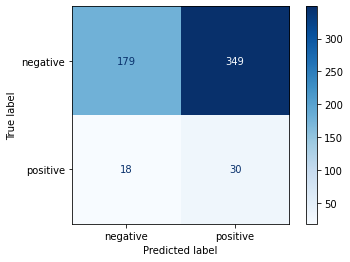

In [12]:
#create model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight = 'balanced')

#train model
classifier.fit(X_train, y_train)

#test model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}\n")

# Calculate classification report
target_names = ["negative", "positive"]
from sklearn.metrics import classification_report
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, display_labels=target_names)
plt.show()

# 
# feature_names = X.columns
# sorted(zip(classifier.feature_importances_, feature_names), reverse=True)
# # apparently logistic regression doesn't have feature importances..?
# 

### Decision Tree

Training Data Score: 0.9994212962962963
Testing Data Score: 0.8333333333333334

              precision    recall  f1-score   support

    negative       0.92      0.90      0.91       528
    positive       0.07      0.08      0.08        48

    accuracy                           0.83       576
   macro avg       0.49      0.49      0.49       576
weighted avg       0.85      0.83      0.84       576



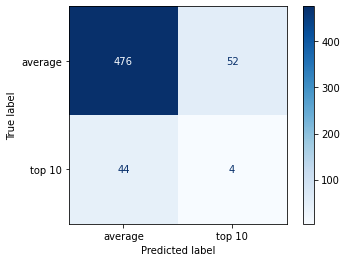

[(0.16667702519705763, 'speechiness'),
 (0.15255527423145201, 'duration_ms'),
 (0.1039901180867187, 'danceability'),
 (0.09163704210495555, 'tempo'),
 (0.0746711298960221, 'liveness'),
 (0.07341893338440644, 'instrumentalness'),
 (0.07137286526075418, 'loudness'),
 (0.059737896666984286, 'valence'),
 (0.043784283818864005, 'artist popularity'),
 (0.041934350315427284, 'acousticness'),
 (0.04048161431564006, 'key'),
 (0.037221664984474274, 'energy'),
 (0.022563996290795, 'art followers'),
 (0.01727392567269902, 'mode'),
 (0.0015708035144379393, 'explicit'),
 (0.0011090762593115014, 'time_signature')]

In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(class_weight = 'balanced')

#train model
clf = clf.fit(X_train, y_train)

#test model
print(f"Training Data Score: {clf.score(X_train, y_train)}")
print(f"Testing Data Score: {clf.score(X_test, y_test)}\n")

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=["average","top 10"])
plt.show()

feature_names = X.columns
sorted(zip(clf.feature_importances_, feature_names), reverse=True)

### Random Forest

Training Data Score: 0.9994212962962963
Testing Data Score: 0.9149305555555556

              precision    recall  f1-score   support

    negative       0.92      1.00      0.96       528
    positive       0.00      0.00      0.00        48

    accuracy                           0.91       576
   macro avg       0.46      0.50      0.48       576
weighted avg       0.84      0.91      0.88       576



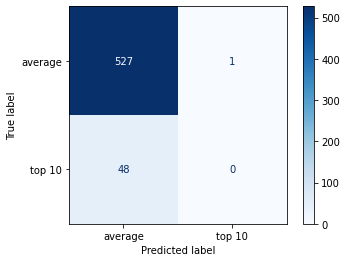

[(0.10929421833173697, 'danceability'),
 (0.09490613264117856, 'valence'),
 (0.09060628768941134, 'speechiness'),
 (0.08272434041657145, 'loudness'),
 (0.08183889428613833, 'energy'),
 (0.08080216383707585, 'duration_ms'),
 (0.07882168580789932, 'tempo'),
 (0.07843647991962695, 'liveness'),
 (0.07834819496919027, 'acousticness'),
 (0.06110504287310426, 'art followers'),
 (0.050066241504377065, 'artist popularity'),
 (0.04553208263909733, 'key'),
 (0.042102567362390195, 'instrumentalness'),
 (0.011470462923074362, 'mode'),
 (0.009078394422168668, 'explicit'),
 (0.00486681037695901, 'time_signature')]

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)

#train model
rf = rf.fit(X_train, y_train)

#test model
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}\n")

predictions = rf.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, display_labels=["average","top 10"])
plt.show()

feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

### K Nearest Neighbors

k: 1, Train/Test Score: 0.999/0.828
k: 3, Train/Test Score: 0.921/0.889
k: 5, Train/Test Score: 0.915/0.905
k: 7, Train/Test Score: 0.911/0.910
k: 9, Train/Test Score: 0.913/0.917
k: 11, Train/Test Score: 0.913/0.917
k: 13, Train/Test Score: 0.913/0.917
k: 15, Train/Test Score: 0.913/0.917
k: 17, Train/Test Score: 0.913/0.917
k: 19, Train/Test Score: 0.913/0.917


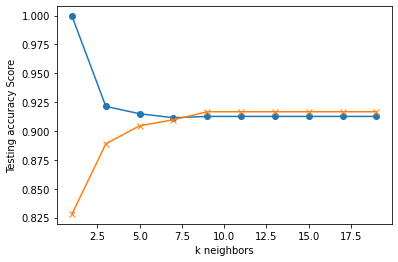

In [15]:
# PART 1

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

Training Data Score: 0.9114583333333334
Testing Data Score: 0.9097222222222222

              precision    recall  f1-score   support

    negative       0.92      1.00      0.96       528
    positive       0.00      0.00      0.00        48

    accuracy                           0.92       576
   macro avg       0.46      0.50      0.48       576
weighted avg       0.84      0.92      0.88       576



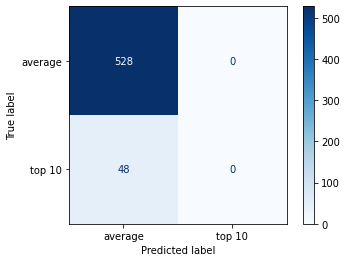

[(0.10929421833173697, 'danceability'),
 (0.09490613264117856, 'valence'),
 (0.09060628768941134, 'speechiness'),
 (0.08272434041657145, 'loudness'),
 (0.08183889428613833, 'energy'),
 (0.08080216383707585, 'duration_ms'),
 (0.07882168580789932, 'tempo'),
 (0.07843647991962695, 'liveness'),
 (0.07834819496919027, 'acousticness'),
 (0.06110504287310426, 'art followers'),
 (0.050066241504377065, 'artist popularity'),
 (0.04553208263909733, 'key'),
 (0.042102567362390195, 'instrumentalness'),
 (0.011470462923074362, 'mode'),
 (0.009078394422168668, 'explicit'),
 (0.00486681037695901, 'time_signature')]

In [16]:
# PART 2

# Note that k: 7 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

#test model
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}\n")

predictions = knn.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues, display_labels=["average","top 10"])
plt.show()

feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

### SVM

In [ ]:
from sklearn.svm import SVC 

model = SVC(kernel='linear', class_weight='balanced')

#train model
model.fit(X_train, y_train)

#test model
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}\n")

# Calculate classification report
target_names = ["negative", "positive"]

predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, display_labels=["average","top 10"])
plt.show()

feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [ ]:
# #Gridsearch

# # Create the GridSearch estimator along with a parameter object containing the values to adjust
# from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [1, 5, 10],
#               'gamma': [0.0001, 0.001, 0.01]}
# grid = GridSearchCV(model, param_grid, verbose=3)

# # Fit the model using the grid search estimator. 
# # This will take the SVC model and try each combination of parameters
# grid.fit(X_train, y_train)

# # List the best parameters for this dataset
# print(grid.best_params_)

# # List the best score
# print(grid.best_score_)

# # Make predictions with the hypertuned model
# predictions = grid.predict(X_test)

# # Calculate classification report
# from sklearn.metrics import classification_report
# print(classification_report(y_test, predictions,
#                             target_names=target_names))